In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import holidays
import pandas as pd
%matplotlib notebook

In [2]:
plt.rcParams["figure.figsize"] = (16,8)
DAY = 96

In [3]:
with open('power_data_eamonn-1.txt', 'r') as f:
    x = f.readlines()
x

['950\n',
 '\n',
 '939\n',
 '\n',
 '943\n',
 '\n',
 '971\n',
 '\n',
 '1014\n',
 '\n',
 '1041\n',
 '\n',
 '1023\n',
 '\n',
 '1030\n',
 '\n',
 '1004\n',
 '\n',
 '995\n',
 '\n',
 '989\n',
 '\n',
 '984\n',
 '\n',
 '984\n',
 '\n',
 '991\n',
 '\n',
 '1000\n',
 '\n',
 '1013\n',
 '\n',
 '1014\n',
 '\n',
 '1001\n',
 '\n',
 '988\n',
 '\n',
 '1024\n',
 '\n',
 '1041\n',
 '\n',
 '1038\n',
 '\n',
 '1040\n',
 '\n',
 '999\n',
 '\n',
 '1043\n',
 '\n',
 '1064\n',
 '\n',
 '1077\n',
 '\n',
 '1058\n',
 '\n',
 '1068\n',
 '\n',
 '1075\n',
 '\n',
 '1104\n',
 '\n',
 '1083\n',
 '\n',
 '1096\n',
 '\n',
 '1067\n',
 '\n',
 '1078\n',
 '\n',
 '1080\n',
 '\n',
 '1105\n',
 '\n',
 '1112\n',
 '\n',
 '1121\n',
 '\n',
 '1099\n',
 '\n',
 '1080\n',
 '\n',
 '1083\n',
 '\n',
 '1138\n',
 '\n',
 '1078\n',
 '\n',
 '1101\n',
 '\n',
 '1103\n',
 '\n',
 '1119\n',
 '\n',
 '1119\n',
 '\n',
 '1121\n',
 '\n',
 '1113\n',
 '\n',
 '1046\n',
 '\n',
 '1087\n',
 '\n',
 '1086\n',
 '\n',
 '1099\n',
 '\n',
 '1089\n',
 '\n',
 '1128\n',
 '\n',
 '1

In [4]:
x = np.array([int(i) for i in x if i != '\n'])
len(x), x

(35040, array([950, 939, 943, ..., 627, 633, 882]))

In [5]:
x_day = np.mean(np.vstack([x[i*DAY:(i+1)*DAY] for i in range(len(x)//DAY)]), axis=1)
x_day.shape

(365,)

<IPython.core.display.Javascript object>


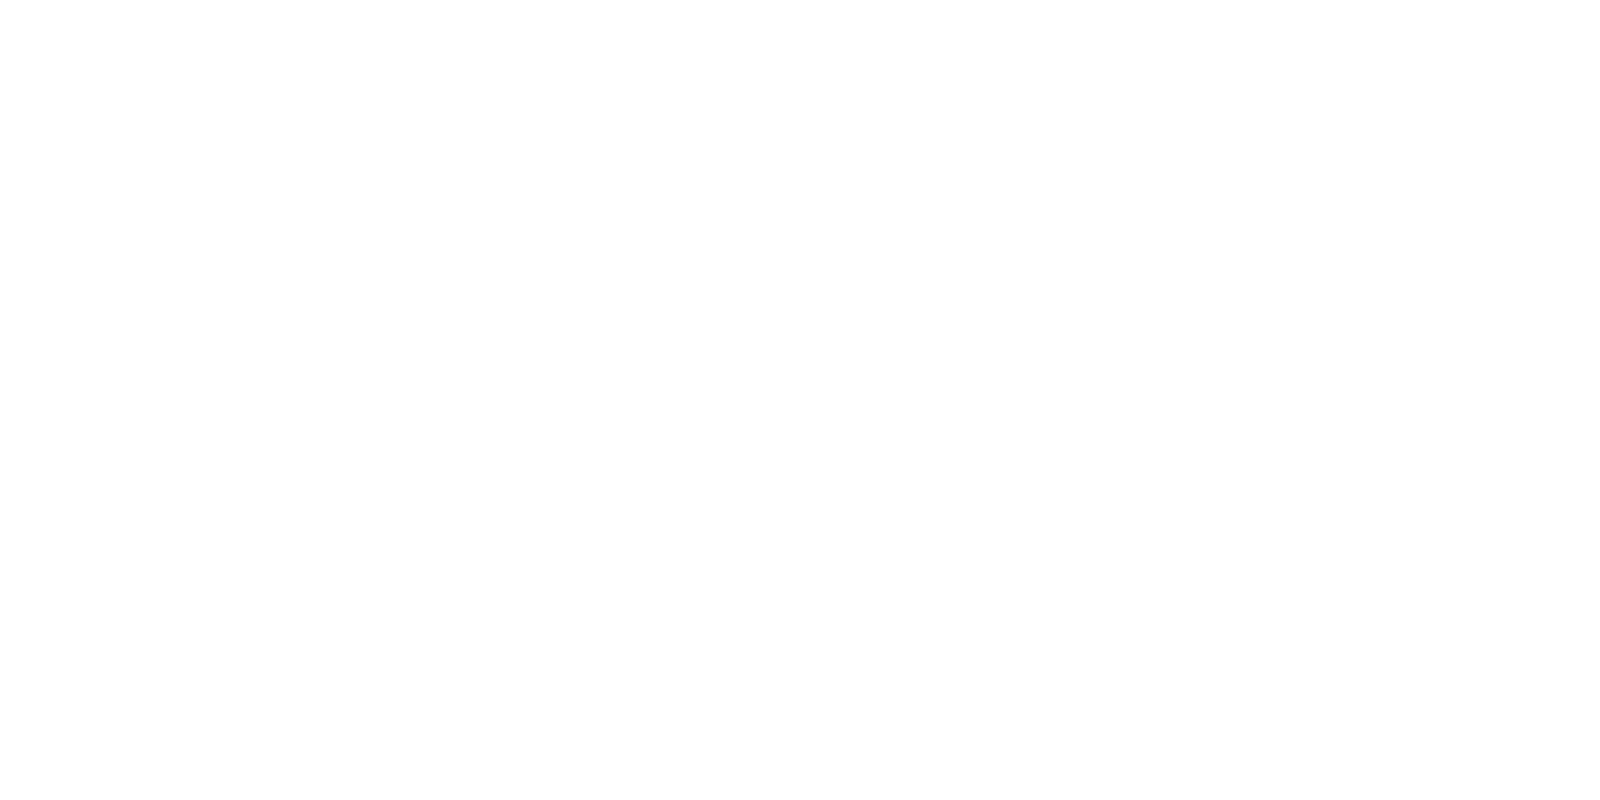

In [6]:
plt.close()
plt.plot(x[:DAY*60])
plt.bar(np.arange(0, DAY*60, DAY) + DAY/2, x_day[:60], width=DAY, alpha=0.2, edgecolor='C2')
plt.show()
# plt.savefig('a.svg')

In [7]:
'''
prev = 0
for idx, (a, b) in enumerate(zip(x_day, x_day[1:])):
    if b - a > 200: # domenica
        print(idx, idx - prev)
        prev = idx
'''

dayweek = []
sday = []
for idx, a in enumerate(x_day):
    dayweek.append((idx+2) % 7)
    if idx > 14:
        avg = (x_day[idx-7] + x_day[idx-14]) * 0.5
        if (idx+2) % 7 < 5:
            # print('settimanale', x_day[idx])
            
            if x_day[idx] > avg * 1.1 or x_day[idx] < avg * 0.9:
                print(idx, dayweek[-1])
                sday.append(idx)
        else:
            # print('festivo', x_day[idx])
            if x_day[idx] > avg * 1.1 or x_day[idx] < avg * 0.9:
                # print(idx, dayweek[-1])
                # sday.append(idx)
                pass
dayweek = np.array(dayweek)
[b-a for a, b in zip(sday,sday[1:])]

86 4
89 0
96 0
100 4
103 0
119 2
124 0
126 2
127 3
131 0
133 2
134 3
138 0
141 3
145 0
152 0
357 2
358 3
359 4
363 1
364 2


[3, 7, 4, 3, 16, 5, 2, 1, 4, 2, 1, 4, 3, 4, 7, 205, 1, 1, 4, 1]

In [8]:
holidays_netherlands = holidays.CountryHoliday('Netherlands')

holi = []
YEAR = 2016
for d in pd.date_range(start=f'01-01-{YEAR}', end=f'31-12-{YEAR}', freq='1D'):
    if d in holidays_netherlands:
        print(d, holidays_netherlands.get(d), d.dayofyear+1)
        holi.append(d.dayofyear+1)
holi = np.array(holi)

2016-01-01 00:00:00 Nieuwjaarsdag 2
2016-03-25 00:00:00 Goede Vrijdag 86
2016-03-27 00:00:00 Eerste paasdag 88
2016-03-28 00:00:00 Tweede paasdag 89
2016-04-27 00:00:00 Koningsdag 119
2016-05-05 00:00:00 Hemelvaart 127
2016-05-15 00:00:00 Eerste Pinksterdag 137
2016-05-16 00:00:00 Tweede Pinksterdag 138
2016-12-25 00:00:00 Eerste Kerstdag 361
2016-12-26 00:00:00 Tweede Kerstdag 362


<IPython.core.display.Javascript object>


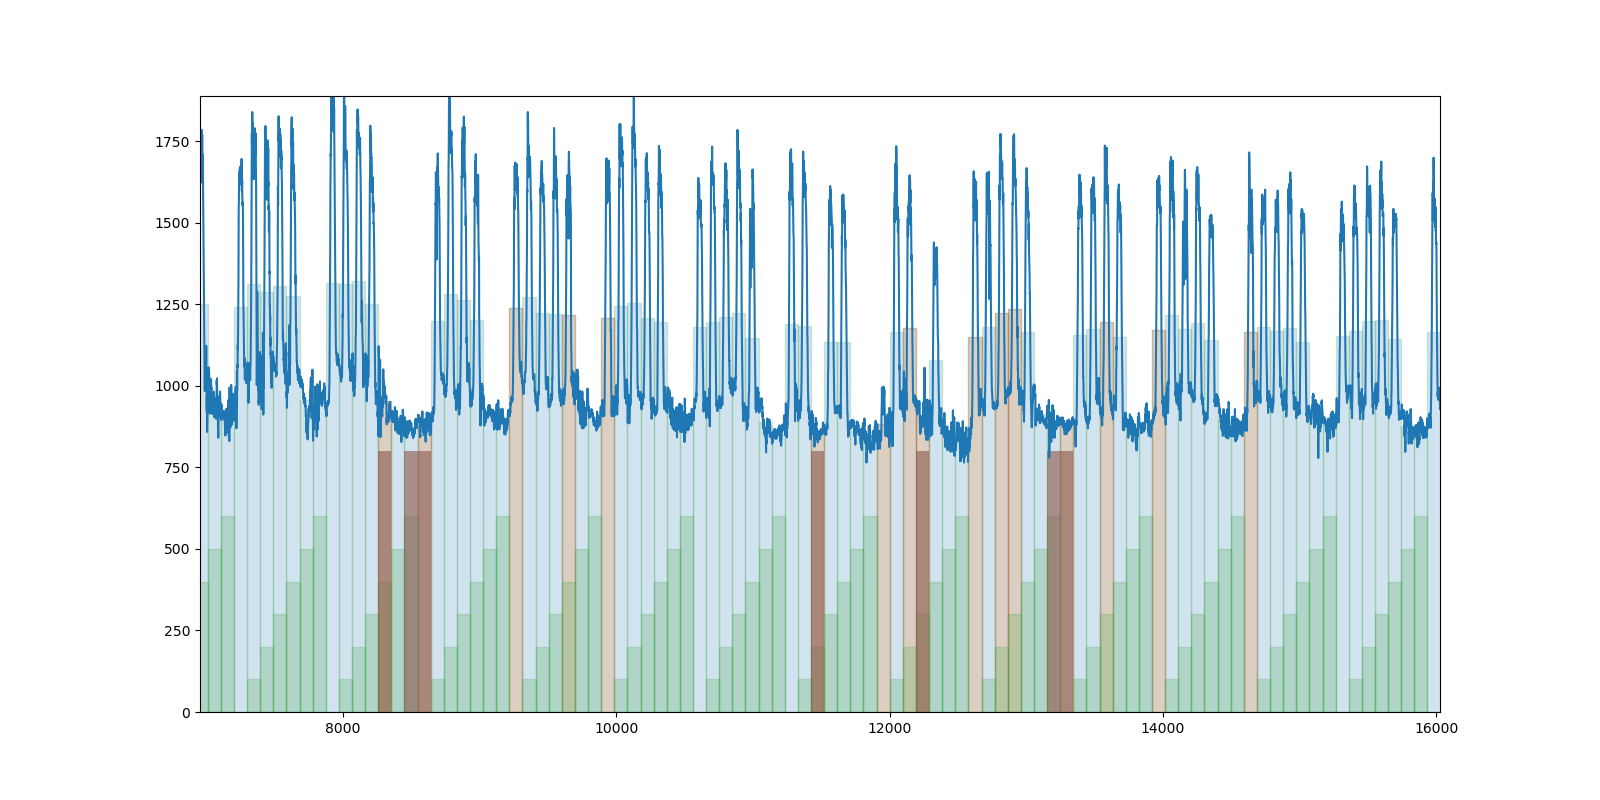

In [9]:
LIML = 0
LIMR = 365

plt.close()
tmp = np.array([a for a in sday if LIML < a < LIMR])
plt.plot(x[DAY*LIML:DAY*LIMR])
plt.bar(np.arange(0, DAY*(LIMR-LIML), DAY) + DAY/2, x_day[LIML:LIMR], width=DAY, alpha=0.2, edgecolor='C2')
plt.bar((tmp-LIML) * DAY + DAY/2, x_day[tmp], width=DAY, alpha=0.2, edgecolor='C3')
plt.bar(np.arange(0, DAY*(LIMR-LIML), DAY) + DAY/2, 100 * dayweek[LIML:LIMR], width=DAY, alpha=0.2, edgecolor='C2')

plt.bar((holi-LIML) * DAY + DAY/2, 800, width=DAY, alpha=0.6, color='C5')

plt.show()